In [2]:
import pandas as pd

df = pd.read_csv('./stock-data.csv')

In [15]:
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
New_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


In [17]:
df['New_Date'] = pd.to_datetime(df['Date']) # 형 변환을 위하여 칼럼을 추가
df.info()

# 새로운 컬럼 New_Date를 index로 설정
df.set_index('New_Date', inplace=True)
df.head()

# 기존의 Date를 삭제
df.drop('Date', axis=1, inplace=True)
df.head()

# 1. 데이터 확인 - df.info(), df.head()
# 2. 날짜형으로 형 변환 - 칼럼 추가함
# 3. 시계형 데이터를 인덱스로 지정 - df.set_index
# 4. 기존의 자료 삭제 - df.drop
# 5. 자료형 및 데이터 확인 - df.info(), df.head()

KeyError: 'Date'

In [25]:
df.reset_index(inplace=True) # 인덱스 제거

In [31]:
df['Year'] = df['New_Date'].dt.year
df['Month'] = df['New_Date'].dt.month
df['Day'] = df['New_Date'].dt.day

df.head()

,New_Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [32]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

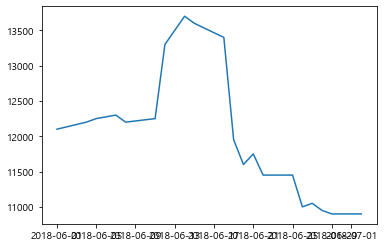

In [34]:
x = df['New_Date']
y = df['High']
plt.plot(x,y)

In [36]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

df = titanic.loc[:, ['age','fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [37]:
# 사용자 함수 정의 : 10을 더하는 함수
def add_10(a):
    return a+10

# 두 객체의 합을 구하는 함수
def add_two_obj(a,b):
    return a+b

In [38]:
# 시리즈 객체에 10을 더하는 함수를 적용
# 시리즈.apply(함수명) : 시리즈 각 원소에 함수 적용
# 데이터프레임.applymap(함수명) : 데이터 프레임에 함수적용
# 데이터프레임 각 열에 대해서 함수 매핑

df['new_age'] = df['age'].apply(add_10) #df['age']
df.head(5)

,age,fare,new_age
0,22.0,7.2500,32.0
1,38.0,71.2833,48.0
2,26.0,7.9250,36.0
3,35.0,53.1000,45.0
4,35.0,8.0500,45.0


In [40]:
df['add_obj'] = df['age'].apply(add_two_obj, b=10)
df.head(3)

,age,fare,new_age,add_obj
0,22.0,7.2500,32.0,32.0
1,38.0,71.2833,48.0,48.0
2,26.0,7.9250,36.0,36.0


In [41]:
df['age'].apply(lambda x: x+10) # 람다 함수 적용

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64

In [42]:
df_map = df.applymap(add_10)
df_map.head(5)

,age,fare,new_age,add_obj
0,32.0,17.2500,42.0,42.0
1,48.0,81.2833,58.0,58.0
2,36.0,17.9250,46.0,46.0
3,45.0,63.1000,55.0,55.0
4,45.0,18.0500,55.0,55.0


In [45]:
result = df.apply(add_10, axis = 0) # 데이터프레임에 apply(함수명, axis=0)
result.head(5)

result_row = df.apply(add_10, axis = 1)
result_row.head(5)

,age,fare,new_age,add_obj
0,32.0,17.2500,42.0,42.0
1,48.0,81.2833,58.0,58.0
2,36.0,17.9250,46.0,46.0
3,45.0,63.1000,55.0,55.0
4,45.0,18.0500,55.0,55.0


In [44]:
df.apply(lambda x: x.max() - x.min()) # 최대값 - 최소값

age         79.5800
fare       512.3292
new_age     79.5800
add_obj     79.5800
dtype: float64

In [ ]:
def min_max(x):
    return x.max() - x.min()

In [ ]:
df.apply(min_max,axis = 0)

In [ ]:
df.apply(min_max,axis = 1)

In [46]:
# pipe 함수 알아보기

df = titanic.loc[:, ['age','fare']]

# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):
    return x.isnull()

# 각 열의 NaN 계수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def total_number_missing(x):
    return missing_count(x).sum()

In [48]:
result_df = df.pipe(missing_count)
result_df

age     177
fare      0
dtype: int64

In [49]:
result_value = df.pipe(total_number_missing)
result_value

177

In [54]:
df = titanic.loc[0:4, 'survived' : 'age']
df

columns = list(df.columns.values)
columns

['survived', 'pclass', 'sex', 'age']

In [60]:
# 열 이름을 알파벳 순으로 정렬
new_columns = sorted(columns)
new_columns

# 열 이름을 정렬한 데이터프레임 생성

df_sorted = df[new_columns]
df_sorted

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0


In [61]:
# 열 분리

df = pd.read_excel('./주가데이터.xlsx', engine = 'openpyxl')

In [65]:
# 1. 연월일을 문자열로 변경
df['연월일'] = df['연월일'].astype('str')
# 2. 연월일을 '-' 기준으로 split
dates = df['연월일'].str.split('-')
dates
# 3. 데이터 프레임에 '연', '월', '일' 칼럼을 추가
# 리스트에서 각 리스트의 동일 원소를 추출하고자 할때 - 리스트.str.get(위치 인덱스)


df['연'] = dates.str.get(0) #dates 변수의 원소 리스트의 0번째 인덱스 값
# df['연'] = dates[0][0]
df['월'] = dates.str.get(1) #dates 변수의 원소 리스트의 1번째 인덱스 값
# df['월'] = dates[0][1]
df['일'] = dates.str.get(2) #dates 변수의 원소 리스트의 2번째 인덱스 값
# df['일'] = dates[0][2]

0     [2018, 07, 02]
1     [2018, 06, 29]
2     [2018, 06, 28]
3     [2018, 06, 27]
4     [2018, 06, 26]
5     [2018, 06, 25]
6     [2018, 06, 22]
7     [2018, 06, 21]
8     [2018, 06, 20]
9     [2018, 06, 19]
10    [2018, 06, 18]
11    [2018, 06, 15]
12    [2018, 06, 14]
13    [2018, 06, 12]
14    [2018, 06, 11]
15    [2018, 06, 08]
16    [2018, 06, 07]
17    [2018, 06, 05]
18    [2018, 06, 04]
19    [2018, 06, 01]
Name: 연월일, dtype: object

In [66]:
s_list = pd.Series([[1,2,3],['abc','def'],['10','20','30']])

s_list.str.get(1)

0      2
1    def
2     20
dtype: object

In [70]:
# 나이가 10대(10~19)인 승객만 따로 선택

mask_age = (titanic.age >= 10) & (titanic.age < 20)
df_teenage = titanic.loc[mask_age, :]
df_teenage.describe()
df_teenage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 9 to 887
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     102 non-null    int64   
 1   pclass       102 non-null    int64   
 2   sex          102 non-null    object  
 3   age          102 non-null    float64 
 4   sibsp        102 non-null    int64   
 5   parch        102 non-null    int64   
 6   fare         102 non-null    float64 
 7   embarked     102 non-null    object  
 8   class        102 non-null    category
 9   who          102 non-null    object  
 10  adult_male   102 non-null    bool    
 11  deck         19 non-null     category
 12  embark_town  102 non-null    object  
 13  alive        102 non-null    object  
 14  alone        102 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 10.4+ KB


In [80]:
# 나이가 10세 미만 60세 이상 승객의 age,fare,sex,class 칼럼 정보만 출력
titanic = sns.load_dataset('titanic')

mask_1 = (titanic.age < 10) | (titanic.age >= 60)
df_alive = titanic.loc[mask_1,['age','fare','sex','class','alive']]

df_alive

# 나이가 10세 미만이고 여성인 승객만 따로
df_female = titanic.loc[(titanic.age<10)&(titanic.sex =='female'), :]

df_female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [89]:
# 함께 탑승한 승객이 3, 4, 5인 승객만 따로 추출

df_sibsp = titanic.sibsp > 2
df_sibsp1 = titanic.loc[df_sibsp,['sibsp']]
df_sibsp1

,sibsp
7,3
16,4
24,3
27,3
50,4
59,5
63,3
68,4
71,5
85,3


In [92]:
mask2 = (titanic['sibsp']==3) | (titanic['sibsp']==4) | (titanic['sibsp']==5)
df_bollean = titanic[mask2]

df_bollean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False


In [93]:
# isin 매소드 사용

mask3 = titanic['sibsp'].isin([3,4,5])
df_isin = titanic.loc[mask3,['age','fare','sex','sibsp']]
df_isin

,age,fare,sex,sibsp
7,2.0,21.0750,male,3
16,2.0,29.1250,male,4
24,8.0,21.0750,female,3
27,19.0,263.0000,male,3
50,7.0,39.6875,male,4
59,11.0,46.9000,male,5
63,4.0,27.9000,male,3
68,17.0,7.9250,female,4
71,16.0,46.9000,female,5
85,33.0,15.8500,female,3


In [ ]:
# 원하는 데이터만 추출 : boolean mask를 이용, isin() 매서드 이용

In [95]:
# 데이터 프레임 합치기

df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [103]:
df3 = pd.concat([df1,df2]) # 위에서 아래로 행을 이어붙임
print(df3)
print()
df4 = pd.concat([df1,df2], ignore_index = True) # 기존의 인덱스 무시하고 새로운 인덱스 부여
print(df4)
print()
df5 = pd.concat([df1,df2], axis=1) # 열로 붙이기
print(df5)
print()

# 조인 키워드
df6 = pd.concat([df1,df2], axis=1, join='inner') #inner = 같은것(교집합), outer = 다 보여준다 default
print(df6)
print()

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
2  a2  b2  c2   d2
3  a3  b3  c3   d3
4  a4  b4  c4   d4
5  a5  b5  c5   d5

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
4  a2  b2  c2   d2
5  a3  b3  c3   d3
6  a4  b4  c4   d4
7  a5  b5  c5   d5

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5

    a   b   c   a   b   c   d
2  a2  b2  c2  a2  b2  c2  d2
3  a3  b3  c3  a3  b3  c3  d3



In [107]:
# 데이터프레임과 시리즈 연결

# 시리즈 생성
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

# df1 과 sr1을 좌우 열 방향으로 연결하기 (index 없는 경우)
df_s1 = pd.concat([df1,sr1], axis=1)
df_s1

# df2 과 sr2을 좌우 열 방향으로 연결하기 (index 존재)
df_s2 = pd.concat([df2,sr2], axis=1)
df_s2

# sr1과 sr3 좌우 열 방향
s_13 = pd.concat([sr1,sr3], axis=1) # sort = True 사용 가능
s_13

# sr1과 sr3행 방향으로 연결
sr_13 = pd.concat([sr1,sr3])
sr_13

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object